In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
%matplotlib inline
#import datetime
#import requests
#import statsmodels.api as sm
#from scipy.stats import kruskal, mannwhitneyu

In [3]:
pd.set_option('max_columns',500)
pd.set_option('max_rows',500)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# 5. Machine Learning Model 

## 5.1  Data preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Read data

In [32]:
in_file = '../data/processed/df_ml.csv'
df = pd.read_csv(in_file)

Here we split the data into the training and test sets, with test size of 0.25.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['log_price','price'],axis=1), 
                                                    df.log_price, test_size=0.25, random_state=1) 

Then, we create a scaler to normalize the training data and use the same scaler to scale the test data.  

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5.3 Linear Regression Model

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
lm_pred_train = lm.predict(X_train)

lm_residual_train = y_train - lm_pred_train
lm_PE_train = np.divide((y_train - lm_pred_train), y_train) *100

metrics_lm_train = ['Train R2',  'Train RMSE','Train AMPE']

lm_train_results = [lm.score(X_train, y_train),
                         np.sqrt(mean_squared_error(y_train, lm_pred_train)),
                         np.mean(np.abs(lm_PE_train))]

for metric, result in zip(metrics_lm_train,lm_train_results):
    print(f'{metric}: {result}')

print()
    
lm_pred_test = lm.predict(X_test)

lm_residual = y_test - lm_pred_test
lm_PE_test = np.divide((y_test - lm_pred_test), y_test) *100

    
metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']
    

lm_test_results = [lm.score(X_test, y_test), np.sqrt(mean_squared_error(y_test, lm_pred_test)),
                  np.mean(np.abs(lm_PE_test))]

for metric, result in zip(metrics_test,lm_test_results):
    print(f'{metric}: {result}')
    


Train R2: 0.6845713970492924
Train RMSE: 0.3795139223015571
Train AMPE: 6.355014778679332

Test R^2: 0.6541319243720015
Test RMSE: 0.39581347387084526
Test AAPE: 6.538364892583893


In [38]:
np.column_stack([y_test, lm_pred_test, np.abs(lm_PE_test)])[:30]

array([[  5.99146455,   5.67912878,   5.21301209],
       [  4.07753744,   4.31299413,   5.77448256],
       [  4.59511985,   4.82116521,   4.91924849],
       [  4.47733681,   4.29224218,   4.1340342 ],
       [  4.86753445,   4.14264883,  14.89225462],
       [  4.49980967,   4.78095068,   6.24784215],
       [  5.29831737,   5.35861028,   1.13796347],
       [  5.65248918,   5.34859289,   5.37632684],
       [  4.39444915,   4.35385336,   0.92379723],
       [  5.30330491,   4.80924047,   9.31616126],
       [  3.91202301,   4.18770803,   7.04712177],
       [  6.10924758,   5.37804998,  11.96870143],
       [  4.30406509,   4.80635656,  11.67016426],
       [  3.91202301,   4.11977972,   5.31072313],
       [  4.00733319,   4.08931173,   2.0457132 ],
       [  4.12713439,   4.77177251,  15.61950905],
       [  4.31748811,   4.77760519,  10.65705476],
       [  5.52146092,   4.79134145,  13.22330225],
       [  4.77912349,   4.8594457 ,   1.68068911],
       [  3.63758616,   3.81892

In [39]:
np.abs(lm_PE_test).mean()

6.538364892583893

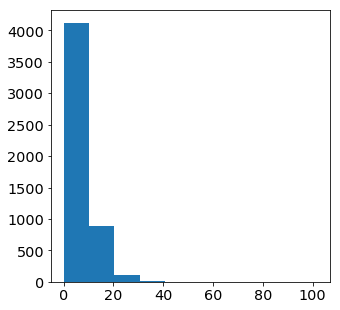

In [44]:
plt.hist(np.abs(lm_PE_test));

Text(0,0.5,'absolute percentage difference')

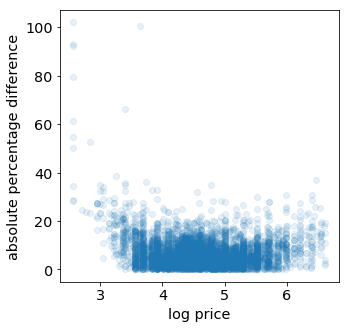

In [42]:
plt.scatter(y_test, np.abs(lm_PE_test), alpha = 0.1)
plt.xlabel('log price')
plt.ylabel('absolute percentage difference')

In [46]:
# Get model performance with unlogged result

lm_PE_test_unlog = np.divide(np.exp(y_test) - np.exp(lm_pred_test), np.exp(y_test)) *100

metrics = ['Test R^2', 'Test RMSE', "Test AAPE"]

lm_test_results_unlog = [r2_score(np.exp(y_test), np.exp(lm_pred_test)),
                         np.sqrt(mean_squared_error(np.exp(y_test), np.exp(lm_pred_test))), 
                         np.mean(np.abs(lm_PE_test_unlog))]

for metric, result in zip(metrics_test, lm_test_results_unlog):
    print(f'{metric}: {result}')

Test R^2: 0.46804712561557504
Test RMSE: 73.74367824991187
Test AAPE: 32.19531530906566


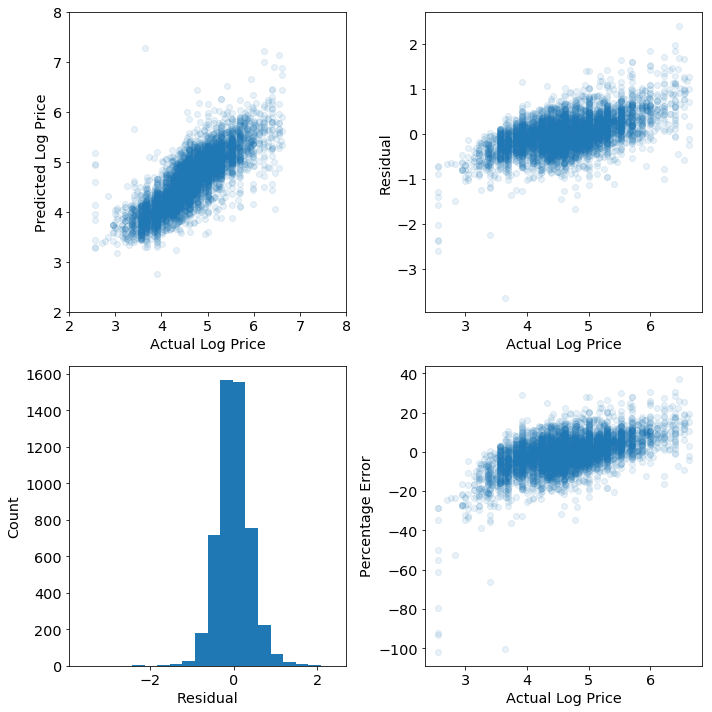

In [49]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,lm_pred_test, alpha=0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.xlim([2,8])
plt.ylim([2,8])
plt.subplot(2,2,2)
plt.scatter(y_test,lm_residual, alpha = 0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(lm_residual, bins= 20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, lm_PE_test, alpha = 0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Percentage Error')
#plt.suptitle('Linear Model Performance',y = 1.05,size=20)
plt.tight_layout()
#plt.show()
plt.savefig('../reports/final_report_figures/lm_diagnostics.png')

## 5.4 Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from collections import OrderedDict

In [51]:
RANDOM_STATE = 10
N_ESTIMATORS = 1000
ensemble_models = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(n_estimators= N_ESTIMATORS,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(n_estimators = N_ESTIMATORS,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(n_estimators = N_ESTIMATORS,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))]

oob_r2_dict = OrderedDict((label,[]) for label, _ in ensemble_models)

min_estimators = 50
max_estimators = N_ESTIMATORS

for label, model in ensemble_models:
    for i in range(min_estimators, max_estimators + 1):
        model.set_params(n_estimators = i)
        model.fit(X_train,y_train)
        
        oob_r2 = model.oob_score_

        oob_r2_dict[label].append((i,oob_r2))

In [52]:
figure_folder = '../reports/final_report_figures/'

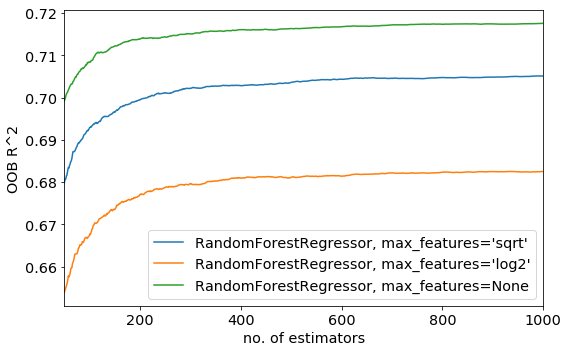

In [59]:
plt.figure(figsize=(8,5))

for label, model_r2 in oob_r2_dict.items():
    xs, ys = zip(*model_r2)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("no. of estimators")
plt.ylabel("OOB R^2")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(figure_folder + 'rf_oob_1000.png')
plt.show()

In [60]:
RANDOM_STATE = 10
rf = RandomForestRegressor(max_features=None,n_estimators=300, random_state = RANDOM_STATE)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [61]:
rf_pred_test = rf.predict(X_test)

rf_residual = y_test - rf_pred_test
rf_PE_test = np.divide((y_test - rf_pred_test), y_test) *100


rf_test_results = [rf.score(X_test, y_test),np.sqrt(mean_squared_error(y_test, rf_pred_test)),
                  np.mean(np.abs(rf_PE_test))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']
    
for metric, result in zip(metrics_test,rf_test_results):
    print(f'{metric}: {result}')


Test R^2: 0.7079792284704325
Test RMSE: 0.3636990839329087
Test AAPE: 5.867933499152108


In [62]:
rf_PE_test_unlog = np.divide(np.exp(y_test) - np.exp(rf_pred_test), np.exp(y_test)) *100

rf_test_results_unlog = [r2_score(np.exp(y_test), np.exp(rf_pred_test)),
                         np.sqrt(mean_squared_error(np.exp(y_test), np.exp(rf_pred_test))), 
                         np.mean(np.abs(rf_PE_test_unlog))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']
    
for metric, result in zip(metrics_test,rf_test_results_unlog):
    print(f'{metric}: {result}')

Test R^2: 0.6069322462244581
Test RMSE: 63.390171161139975
Test AAPE: 28.546682373397708


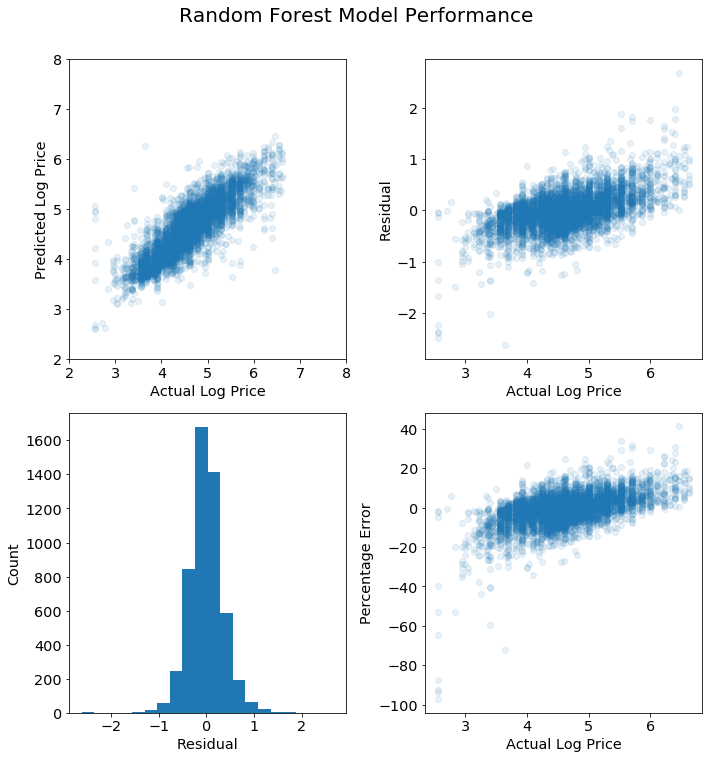

In [113]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,rf_pred_test, alpha = 0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.xlim([2,8])
plt.ylim([2,8])
plt.subplot(2,2,2)
plt.scatter(y_test,rf_residual,alpha = 0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(rf_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, rf_PE_test,alpha = 0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Percentage Error')
plt.suptitle('Random Forest Model Performance',y = 1.05, size=20)
plt.tight_layout()
plt.savefig(figure_folder + 'rf_diags.png')
plt.show()

In [64]:
import seaborn as sns

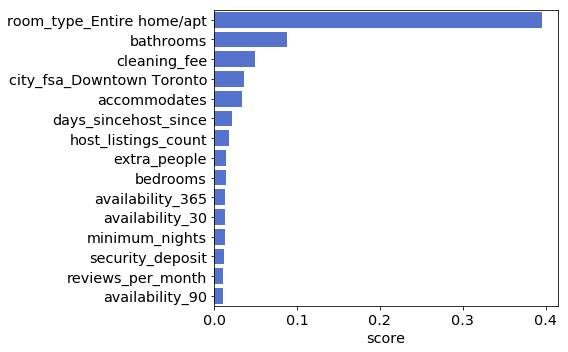

In [66]:
#n_estimator = 300 (new)
rf_feature_importances = pd.DataFrame({'score':rf.feature_importances_,
                                      'feature': df.drop(['price','log_price'],axis=1).columns})
rf_feature_importances = rf_feature_importances.sort_values('score',ascending=False)[:15]

plt.figure(figsize=(8,5))
sns.barplot(data = rf_feature_importances,y='feature',x='score',color='royalblue')
plt.ylabel('')
plt.tight_layout()
plt.savefig(figure_folder + 'rf_feat_importance.png');

## 3.5 Gradient boosting

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import datetime

In [54]:
## Grid Search with CV
RANDOM_STATE = 10

gb = GradientBoostingRegressor(warm_start = True, random_state = RANDOM_STATE)
param_grid = {'learning_rate':[0.01 ,0.1, 1], 'n_estimators':[100, 300, 500],
              'max_depth': [2, 5], 'max_features' :[None, 'sqrt','log2']}
gb_cv = GridSearchCV(estimator=gb,param_grid=param_grid,cv=5, refit=True)

gb_cv_start_time = datetime.datetime.now()
gb_cv.fit(X_train,y_train)
gb_cv_end_time = datetime.datetime.now()

In [68]:
(gb_cv_start_time,gb_cv_end_time)

(datetime.datetime(2019, 9, 23, 3, 37, 25, 200109),
 datetime.datetime(2019, 9, 23, 5, 24, 53, 258053))

In [70]:
gb_best_params = gb_cv.best_params_
gb_best_params

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [72]:
table_folder = '../reports/final_report_tables/'

In [77]:
pd.DataFrame(OrderedDict({'learning_rate': gb_cv.cv_results_['param_learning_rate'],
'max_depth':gb_cv.cv_results_['param_max_depth'],
'max_features':gb_cv.cv_results_['param_max_features'],
'n_estimators':gb_cv.cv_results_['param_n_estimators'],
"mean_test_score":gb_cv.cv_results_['mean_test_score']})).to_csv(table_folder + '/gb_cv_results.csv')

In [79]:
# Build GBM model
RANDOM_STATE=10
gb = GradientBoostingRegressor(learning_rate=gb_best_params['learning_rate'],
                               max_depth=gb_best_params['max_depth'],
                               max_features = gb_best_params['max_features'],
                               n_estimators = gb_best_params['n_estimators'],warm_start=True, random_state=RANDOM_STATE)
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=10, subsample=1.0, verbose=0,
             warm_start=True)

In [80]:
gb_pred_test = gb_cv.predict(X_test)
gb_residual = y_test - gb_pred_test
gb_PE_test = np.divide((y_test - gb_pred_test), y_test) *100

gb_test_results = [gb.score(X_test, y_test),np.sqrt(mean_squared_error(y_test, gb_pred_test)),
                  np.mean(np.abs(gb_PE_test))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']
    
for metric, result in zip(metrics_test,gb_test_results):
    print(f'{metric}: {result}')

Test R^2: 0.7263740538728344
Test RMSE: 0.35205780204895737
Test AAPE: 5.736031957852431


In [81]:
gb_PE_test_unlog = np.divide(np.exp(y_test) - np.exp(gb_pred_test), np.exp(y_test)) *100

gb_test_results_unlog = [r2_score(np.exp(y_test), np.exp(gb_pred_test)),
                         np.sqrt(mean_squared_error(np.exp(y_test), np.exp(gb_pred_test))), 
                         np.mean(np.abs(gb_PE_test_unlog))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']
    
for metric, result in zip(metrics_test,gb_test_results_unlog):
    print(f'{metric}: {result}')

Test R^2: 0.6382363956130388
Test RMSE: 60.81359142482493
Test AAPE: 27.78834533250622


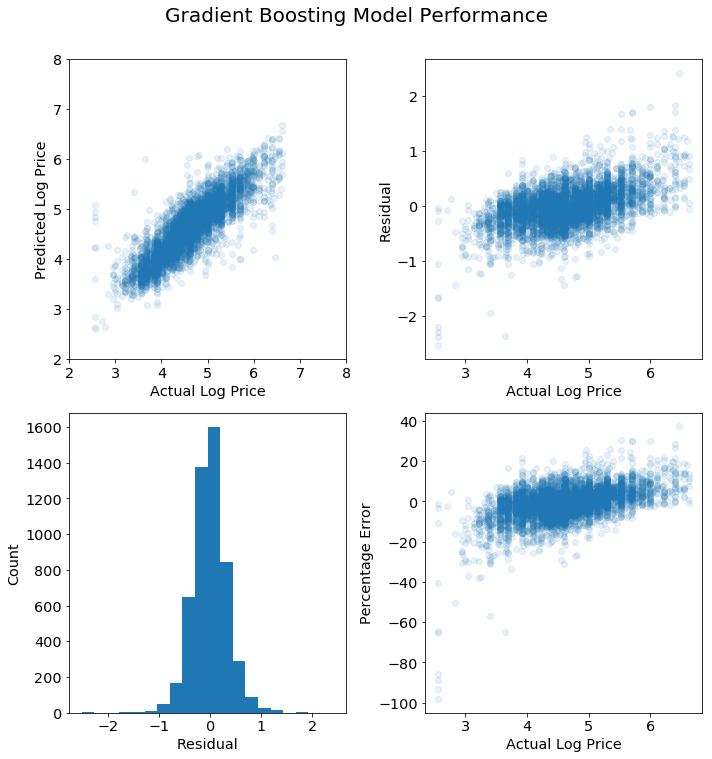

In [114]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,gb_pred_test, alpha=0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.xlim([2,8])
plt.ylim([2,8])
plt.subplot(2,2,2)
plt.scatter(y_test,gb_residual,alpha=0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(gb_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, gb_PE_test,alpha=0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Percentage Error')
plt.suptitle('Gradient Boosting Model Performance',y = 1.05, size=20)
plt.tight_layout()
plt.savefig(figure_folder + '/gb_diags.png')
plt.show()

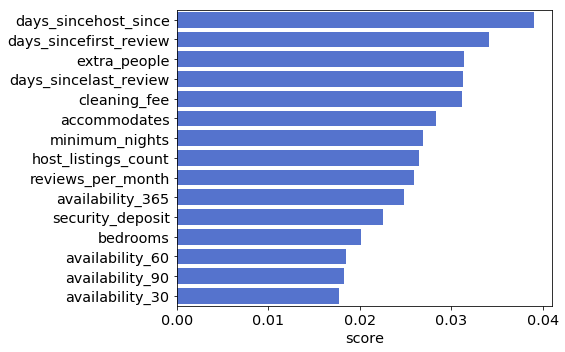

In [85]:
gb_feature_importances = pd.DataFrame({'score':gb.feature_importances_,
                                      'feature': df.drop(['price','log_price'],axis=1).columns})
gb_feature_importances = gb_feature_importances.sort_values('score',ascending=False)[:15]

plt.figure(figsize=(8,5))
sns.barplot(data = gb_feature_importances,y='feature',x='score',color='royalblue')
plt.ylabel('')
plt.tight_layout()
plt.savefig(figure_folder + '/gb_feat_importance.png');

## 3.6 XGBoost

In [55]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 

In [56]:
xg = xgb.XGBRegressor(random_state=10, warm_start=True)
xg_param_grid = {'colsample_bytree': [0.5, 0.75, 1], 'n_estimators': [100, 300, 500], 'max_depth': [2, 5], 'gamma':[0,0.1,0.2],
                'eta':[0.1, 0.3, 0.5]}

xg_cv = GridSearchCV(estimator=xg,param_grid=xg_param_grid,cv=5,verbose=1)

In [57]:
xg_cv_start_time = datetime.datetime.now()
xg_cv.fit(X_train, y_train)
xg_cv_end_time = datetime.datetime.now()

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 439.9min finished


In [58]:
(xg_cv_start_time, xg_cv_end_time)

(datetime.datetime(2019, 9, 23, 5, 24, 53, 715904),
 datetime.datetime(2019, 9, 23, 12, 45, 55, 740203))

In [86]:
xg_best_params = xg_cv.best_params_
xg_best_params

{'colsample_bytree': 0.5,
 'eta': 0.1,
 'gamma': 0.2,
 'max_depth': 5,
 'n_estimators': 500}

In [87]:
xg_cv.cv_results_

C:\Users\georg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\georg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\georg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\georg\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([  6.9773417 ,  21.43463278,  33.85155869,  10.85217962,
         31.73613434,  52.30014353,   6.85905881,  20.12717838,
         33.53313632,  10.74667459,  31.68128843,  52.61296086,
          6.94622474,  20.28595262,  33.57621312,  10.81927595,
         31.69426489,  52.37294855,   6.9161056 ,  20.08289628,
         34.08082371,  10.83522573,  31.8831542 ,  52.65638547,
          6.88160586,  20.19181123,  33.58758984,  10.78258591,
         31.73017111,  54.16815343,   6.89237523,  20.30909872,
         33.45095506,  10.74886374,  31.67889218,  52.28339906,
          6.89835925,  20.16308141,  33.3863409 ,  10.74168911,
         31.64917526,  52.25946622,   6.9276937 ,  20.22613292,
         33.47970595,  10.79095025,  31.5602035 ,  52.52154603,
          6.88939128,  20.21912498,  33.40546961,  10.739083  ,
         31.56620092,  52.43836904,   8.01158271,  23.66312332,
         40.59404855,  13.69937253,  40.43267822,  67.04910307,
          8.05625868,  

In [88]:
pd.DataFrame(OrderedDict({'colsample_bytree':xg_cv.cv_results_['param_colsample_bytree'], 
                          'eta': xg_cv.cv_results_['param_eta'],
            'gamma': xg_cv.cv_results_['param_gamma'],
            'max_depth': xg_cv.cv_results_['param_max_depth'],
             'n_estimators': xg_cv.cv_results_['param_n_estimators'],
             'mean_test_score': xg_cv.cv_results_['mean_test_score']})).to_csv(table_folder + 'xg_cv_results.csv')

In [89]:
xg = xgb.XGBRegressor(colsample_bytree = xg_best_params['colsample_bytree'], 
                      eta = xg_best_params['eta'],
                      gamma = xg_best_params['gamma'],
                      n_estimators = xg_best_params['n_estimators'],
                 max_depth = xg_best_params['max_depth'],  random_state=RANDOM_STATE)

xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, eta=0.1, gamma=0.2, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [90]:
xg_pred_test = xg.predict(X_test)
xg_residual = y_test - xg_pred_test
xg_PE_test = np.divide((y_test - xg_pred_test), y_test) *100

xg_test_results = [xg.score(X_test, y_test),np.sqrt(mean_squared_error(y_test, xg_pred_test)),
                  np.mean(np.abs(xg_PE_test))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']
    
for metric, result in zip(metrics_test,xg_test_results):
    print(f'{metric}: {result}')

Test R^2: 0.732507627908165
Test RMSE: 0.34808959059565
Test AAPE: 5.62814416100063


In [91]:
xg_PE_test_unlog = np.divide(np.exp(y_test) - np.exp(xg_pred_test), np.exp(y_test)) *100

xg_test_results_unlog = [r2_score(np.exp(y_test), np.exp(xg_pred_test)),
                         np.sqrt(mean_squared_error(np.exp(y_test), np.exp(xg_pred_test))), 
                         np.mean(np.abs(xg_PE_test_unlog))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']
    
for metric, result in zip(metrics_test,xg_test_results_unlog):
    print(f'{metric}: {result}')

Test R^2: 0.6466755382333564
Test RMSE: 60.10008261352315
Test AAPE: 27.311828242126808


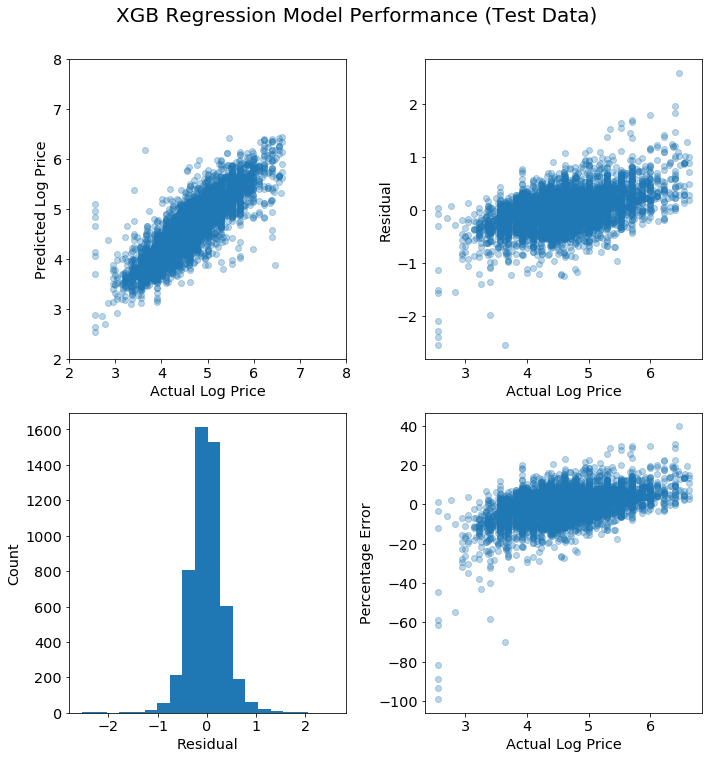

In [94]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,xg_pred_test, alpha=0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.xlim([2,8])
plt.ylim([2,8])
plt.subplot(2,2,2)
plt.scatter(y_test,xg_residual, alpha=0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(xg_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, xg_PE_test, alpha=0.1)
plt.xlabel('Actual Log Price')
plt.ylabel('Percentage Error')
plt.suptitle('XGB Regression Model Performance (Test Data)',y = 1.05, size=20)
plt.tight_layout()
plt.savefig(figure_folder + 'xg_diags.png')
plt.show()

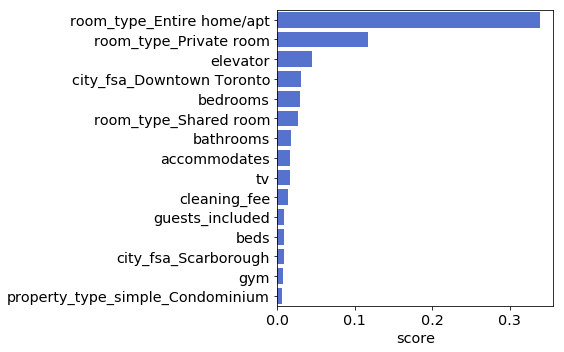

In [95]:
xg_feature_importances = pd.DataFrame({'score':xg.feature_importances_,
                                      'feature': df.drop(['price','log_price'],axis=1).columns})
xg_feature_importances = xg_feature_importances.sort_values('score',ascending=False)[:15]

plt.figure(figsize=(8,5))
sns.barplot(data = xg_feature_importances,y='feature',x='score',color='royalblue')
plt.ylabel('')
plt.tight_layout()
plt.savefig(figure_folder + 'xg_feat_importance.png');

Based on the model, the most important featuers are room type. Also, in this model, a few of amenities make to the top 20 list. 

## 3.7 Model Comparison

We compare the models based on their performances on predicting both the log price and the actual price.  

In [96]:
summary = OrderedDict({"Linear Regression": lm_test_results, "Random Forest": rf_test_results,
                                   'Gradient Boosting': gb_test_results, "XG Boosting": xg_test_results})
df_model_comparison = pd.DataFrame(summary, index=['R^2','RMSE','AAPE'])
print("Model Performances (Log Price)")
df_model_comparison

Model Performances (Log Price)


,Linear Regression,Random Forest,Gradient Boosting,XG Boosting
R^2,0.654132,0.707979,0.726374,0.732508
RMSE,0.395813,0.363699,0.352058,0.348090
AAPE,6.538365,5.867933,5.736032,5.628144


In [97]:
summary = OrderedDict({"Linear Regression": lm_test_results_unlog, "Random Forest": rf_test_results_unlog,
                                   'Gradient Boosting': gb_test_results_unlog, "XG Boost": xg_test_results_unlog})
df_model_comparison = pd.DataFrame(summary, index=['R^2','RMSE','AAPE'])
print("Model Performances (Price)")
df_model_comparison

Model Performances (Price)


,Linear Regression,Random Forest,Gradient Boosting,XG Boost
R^2,0.468047,0.606932,0.638236,0.646676
RMSE,73.743678,63.390171,60.813591,60.100083
AAPE,32.195315,28.546682,27.788345,27.311828


In [100]:
xg_residual_unlog = np.exp(y_test) - np.exp(xg_pred_test)

In [101]:
df_xg = pd.DataFrame(np.exp(y_test)).merge(pd.DataFrame(np.exp(xg_pred_test),index=y_test.index,columns=['predicted_price']),left_index=True,right_index=True)
df_xg.columns = ['price','predicted_price']
df_xg['residual'] = df_xg.price - df_xg.predicted_price
df_xg['percent_error'] = np.divide(df_xg.price - df_xg.predicted_price,df_xg.price)*100
df_xg['abs_percent_error'] = np.abs(df_xg['percent_error'])

In [105]:
df_xg.head()

,price,predicted_price,residual,percent_error,abs_percent_error
12030,400.0,339.552338,60.447662,15.111916,15.111916
14791,59.0,88.024055,-29.024055,-49.193314,49.193314
168,99.0,138.080444,-39.080444,-39.475196,39.475196
10274,88.0,75.802963,12.197037,13.860269,13.860269
6779,130.0,91.531235,38.468765,29.591358,29.591358


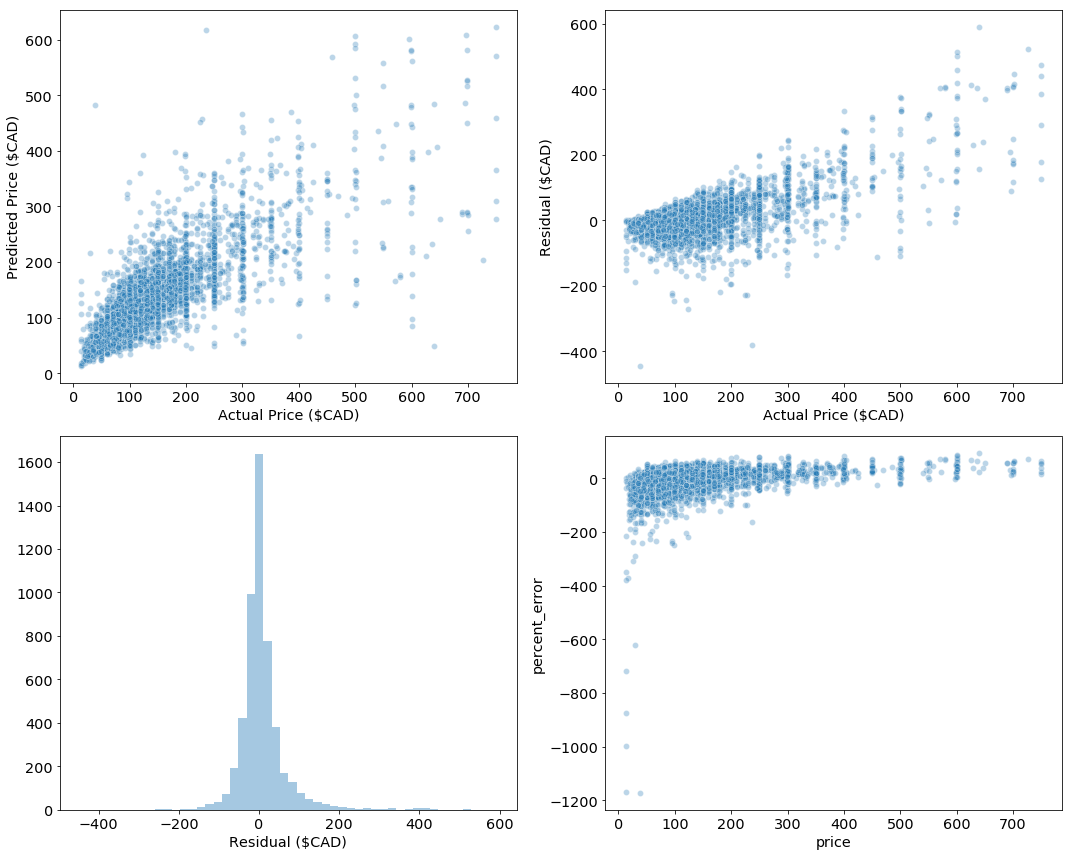

In [106]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.scatterplot(data=df_xg,x='price',y='predicted_price',alpha=0.3)
plt.xlabel('Actual Price ($CAD)')
plt.ylabel('Predicted Price ($CAD)')
plt.subplot(2,2,2)
sns.scatterplot(data=df_xg, x='price',y='residual',alpha=0.3)
plt.xlabel('Actual Price ($CAD)')
plt.ylabel('Residual ($CAD)')
plt.subplot(2,2,3)
sns.distplot(df_xg.residual,kde=False)
plt.xlabel('Residual ($CAD)')
plt.subplot(2,2,4)
sns.scatterplot(data=df_xg, x='price',y='percent_error',alpha=0.3)
plt.tight_layout()
plt.savefig(figure_folder + 'xg_diagnostic_unlog.png');

In [ ]:
df_xg.to_csv('data/df_xg.csv')

### Interval for residual and absolute percentage error

In [102]:
# residual percentile

np.percentile(df_xg.residual,[2.5,97.5])

array([ -79.06928635,  151.56637383])

In [103]:
np.percentile(df_xg.abs_percent_error,[95])

array([ 71.13719147])

## Save model

In [111]:
from joblib import dump, load

In [112]:
model_folder = '../models/2019-09-23/'
date = '_2019-09-23'


dump(lm, model_folder + 'lm' + date + '.joblib')
dump(rf, model_folder + 'rf' + date + '.joblib')
dump(gb, model_folder + 'gb' + date + '.joblib')
dump(xg, model_folder + 'xg' + date + '.joblib')

['../models/2019-09-23/xg_2019-09-23.joblib']

In [ ]:
#APE (Not used)
def ape(actual, predicted):
    return (np.divide((actual - predicted), actual) *100)

In [ ]:
#results df (Not used)
def results_df(actual_data, predicted_data):
    df_results = pd.DataFrame(actual_data)
    df_results['predicted'] = predicted_data
    df_results['residual'] = df_results.iloc[:,0] - df_results['predicted']
    df_results['pct_error'] = ape(df_results.iloc[:,0], df_results['predicted'])
    return df_results